In [15]:
import matplotlib.pyplot as plt
from math import *
import numpy as np
def Run_Kut4(F,x,y,xStop,h):
  def run_kut4(F,x,y,h):
    K0 = h*F(x,y)
    K1 = h*F(x + h/2.0, y + K0/2.0)
    K2 = h*F(x + h/2.0, y + K1/2.0)
    K3 = h*F(x + h, y + K2)
    return (K0 + 2.0*K1 + 2.0*K2 + K3)/6.0
  X = []
  Y = []
  X.append(x)
  Y.append(y)
  while x < xStop:
    h = min(h,xStop - x)
    y = y + run_kut4(F,x,y,h)
    x=x+h
    X.append(x)
    Y.append(y)
  return np.array(X),np.array(Y)

def imprimeSol(X,Y,frec):
 
  def imprimeEncabezado(n):
    print("\n x ",end=" ")
    for i in range (n):
      print(" y[",i,"] ",end=" ")
    print()

  def imprimeLinea(x,y,n):
    print("{:13.4e}".format(x),end=" ")
    for i in range (n):
      print("{:13.4e}".format(y[i]),end=" ")
    print() 
  
  m = len(Y)
  try: n = len(Y[0])
  except TypeError: n = 1
  if frec == 0: frec = m
  imprimeEncabezado(n)
  for i in range(0,m,frec):
   imprimeLinea(X[i],Y[i],n)
  if i != m - 1: imprimeLinea(X[m - 1],Y[m - 1],n)

La solución es

 x   y[ 0 ]   y[ 1 ]   y[ 2 ]   y[ 3 ]  
   0.0000e+00    5.0000e-01    0.0000e+00    1.0472e+00    0.0000e+00 
   4.0000e-02    5.0389e-01    1.9237e-01    1.0337e+00   -6.6897e-01 
   8.0000e-02    5.1509e-01    3.6215e-01    9.9447e-01   -1.2797e+00 
   1.2000e-01    5.3226e-01    4.8711e-01    9.3264e-01   -1.7940e+00 
   1.6000e-01    5.5320e-01    5.4840e-01    8.5236e-01   -2.2025e+00 
   2.0000e-01    5.7514e-01    5.3576e-01    7.5765e-01   -2.5202e+00 
   2.4000e-01    5.9512e-01    4.5246e-01    6.5160e-01   -2.7739e+00 
   2.8000e-01    6.1063e-01    3.1683e-01    5.3623e-01   -2.9900e+00 
   3.2000e-01    6.2016e-01    1.5874e-01    4.1266e-01   -3.1859e+00 
   3.6000e-01    6.2348e-01    1.1916e-02    2.8157e-01   -3.3658e+00 
   4.0000e-01    6.2164e-01   -9.5843e-02    1.4374e-01   -3.5195e+00 
   4.4000e-01    6.1652e-01   -1.5127e-01    6.5578e-04   -3.6245e+00 
   4.8000e-01    6.1017e-01   -1.5973e-01   -1.4521e-01   -3.6539e+00 
   5.2000e-01    6.0

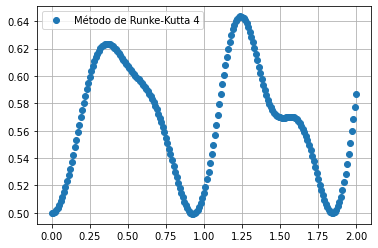

In [16]:
def F(x,y):
  g=9.80665
  k=40
  L=0.5
  m=0.25
  F=np.zeros(4)
  F[0]=y[1]
  F[1]=y[0]*(y[3]**2)+g*np.cos(y[2])-(k/m)*(y[0]-L)
  F[2]=y[3]
  F[3]=(-2*y[1]*y[3]-g*np.sin(y[2]))/y[0]
  return F

y=np.array([0.5,0.0,np.pi/3,0])
X,Y=Run_Kut4(F,0.0,y,2.0,0.01)
print("La solución es")
imprimeSol(X,Y,4)

plt.plot(X,Y[:,0],"o",label="Método de Runke-Kutta 4")
plt.grid()
plt.legend()
plt.show()



In [17]:
theta = Y[:,2]
for i in range(1, len(theta)):
  if theta[i-1] > 0 and theta[i] <= 0:
    t1, t2 = X[i-1], X[i]
    r1, r2 = Y[i-1,0], Y[i,0]
    th1, th2 = theta[i-1], theta[i]
    # Interpolación lineal
    t_cross = t1 + (0 - th1) * (t2 - t1) / (th2 - th1)
    r_cross = r1 + (0 - th1) * (r2 - r1) / (th2 - th1)
    print("θ cruza 0 por primera vez en t ≈ {:.4f} s".format(t_cross))
    print("Longitud de la cuerda en ese instante: r ≈ {:.4f} m".format(r_cross))
    break

θ cruza 0 por primera vez en t ≈ 0.4402 s
Longitud de la cuerda en ese instante: r ≈ 0.6165 m


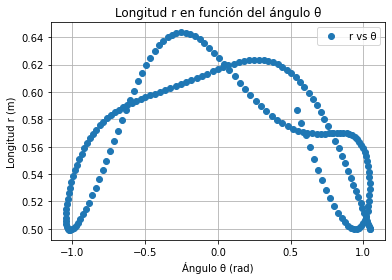

In [18]:
plt.figure()
plt.plot(Y[:,2], Y[:,0], "o", label="r vs θ")
plt.xlabel("Ángulo θ (rad)")
plt.ylabel("Longitud r (m)")
plt.title("Longitud r en función del ángulo θ")
plt.grid()
plt.legend()
plt.show()

